<a href="https://colab.research.google.com/github/KongpobI/Adult-classification/blob/main/AdultIncome_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult salary Classification either obove 50k or less 50k

Reference of data set: https://www.kaggle.com/wenruliu/adult-income-dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(r'https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/adult_data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df['income'].replace({"<=50K": 0, ">50K": 1}, inplace=True)
df["income"].value_counts()

0    37155
1    11687
Name: income, dtype: int64



---

label 0 : <=50K,
label 1 : >50K

# Model

In [ ]:
!pip install --upgrade scikit-learn

**Logistic Regression**

---



In [ ]:
#select 3 hightest corr
abs(df.corr()["income"].sort_values(ascending= False))

<ipython-input-7-1ca5a5f5bbb4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()["income"].sort_values(ascending= False))


income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
capital-loss       0.147554
fnlwgt             0.006339
Name: income, dtype: float64

In [ ]:
#col['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
from sklearn.model_selection import train_test_split
x = df[["age","hours-per-week","educational-num"]]
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

Accuracy: 0.7882344912304647


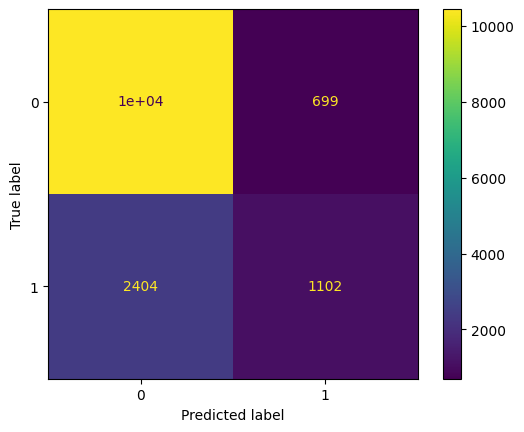

In [ ]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_predLR = LR.predict(x_test)
cmLR = confusion_matrix(y_test, y_predLR)
ConfusionMatrixDisplay(cmLR).plot()
accLR = accuracy_score(y_test,y_predLR)
print("Accuracy:", accLR)

**SVM - Support Vector Machine**

---



In [ ]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(x_train,y_train)

SVC()

Accuracy: 0.7962192042585137


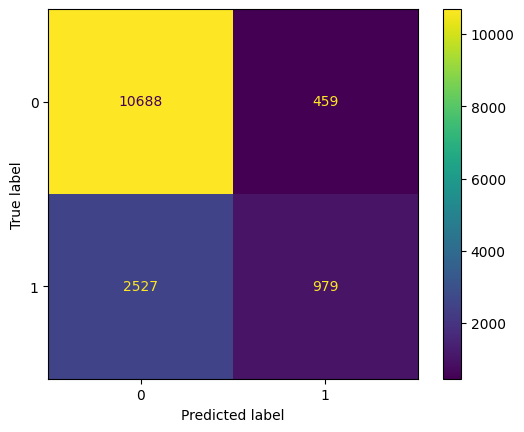

In [ ]:
y_predSVM = SVM.predict(x_test)
cmSVM = confusion_matrix(y_test, y_predSVM)
ConfusionMatrixDisplay(cmSVM).plot()
accSVM = accuracy_score(y_test,y_predSVM)
print("Accuracy:", accSVM)

**Decision Trees**

---



In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy: 0.7754043540571897


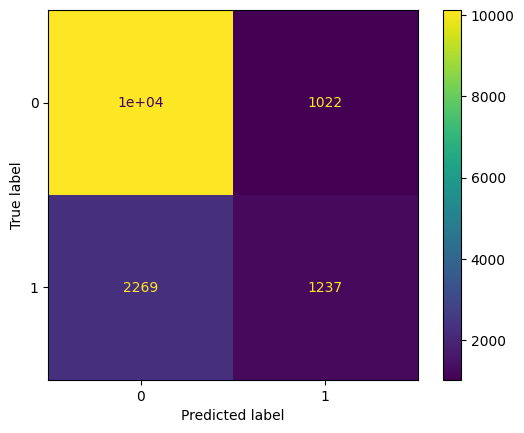

In [ ]:
y_predDT = DT.predict(x_test)
cmDT = confusion_matrix(y_test, y_predDT)
ConfusionMatrixDisplay(cmDT).plot()
accDT = accuracy_score(y_test,y_predDT)
print("Accuracy:", accDT)

**KNN - K Nearest Neighbor**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_list = []
for n in range(1,40) :
  KNN = KNeighborsClassifier(n_neighbors = n)
  KNN.fit(x_train,y_train)
  pred = KNN.predict(x_test)
  acc_list.append( (accuracy_score(y_test, pred), n) )
df = pd.DataFrame(acc_list, columns = ["Acc","n"])
df.head()

,Acc,n
0,0.731796,1
1,0.766737,2
2,0.762028,3
3,0.778748,4
4,0.775268,5


,Acc,n
23,0.794104,24


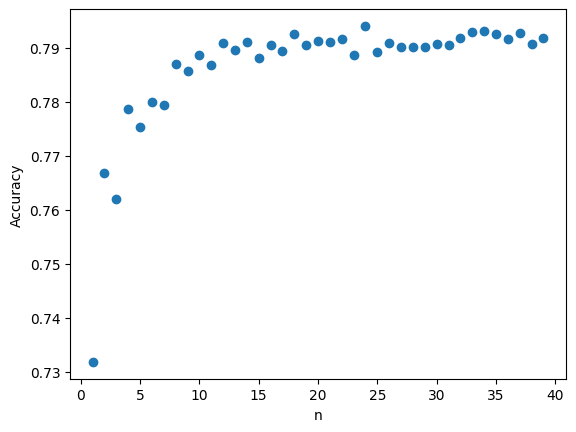

In [ ]:
plt.scatter(df["n"],df["Acc"])
plt.xlabel("n")
plt.ylabel("Accuracy")
best_n = df[df["Acc"] == df["Acc"].max()]
best_n



---
จะเห็นว่าเมื่อ n มากๆ Accจะลู่เข้าสู่ 0.79


Accuracy: 0.7941035965331331


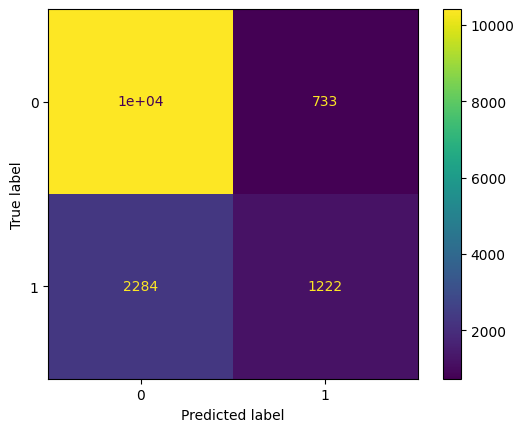

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = int(best_n["n"]))
KNN.fit(x_train,y_train)

y_predKNN = KNN.predict(x_test)
cmKNN = confusion_matrix(y_test, y_predKNN)
ConfusionMatrixDisplay(cmKNN).plot()
accKNN = accuracy_score(y_test,y_predKNN)
print("Accuracy:", accKNN)

**Naive Bayes**

---



In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

Accuracy: 0.7974476216474442


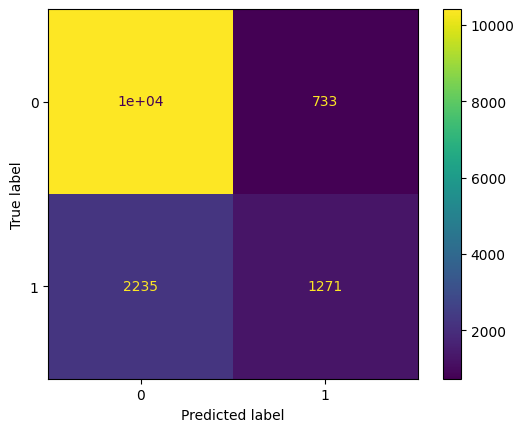

In [ ]:
y_predNB = NB.predict(x_test)
cmNB = confusion_matrix(y_test, y_predNB)
ConfusionMatrixDisplay(cmNB).plot()
accNB = accuracy_score(y_test,y_predNB)
print("Accuracy:", accNB)


ROC Curve
---



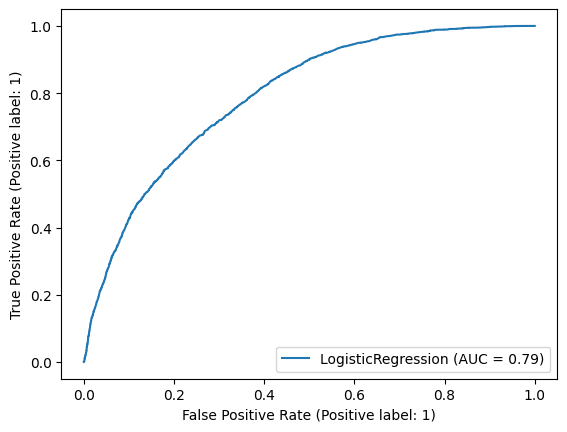

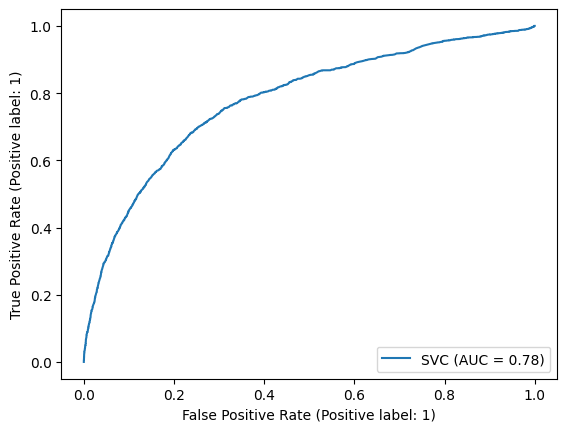

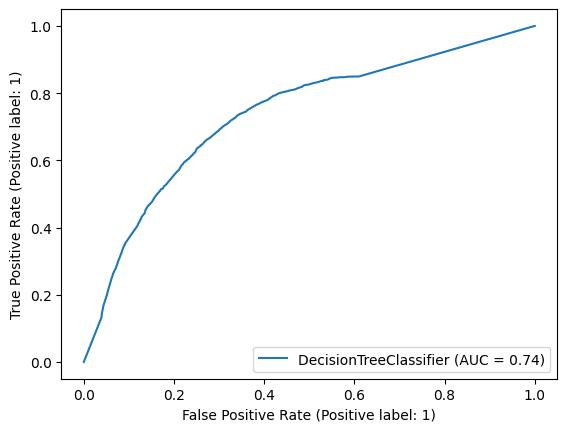

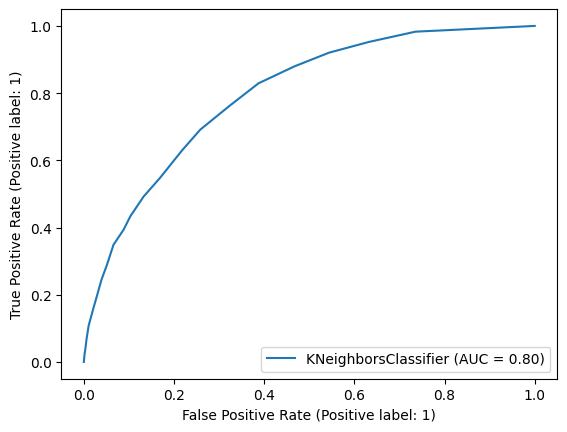

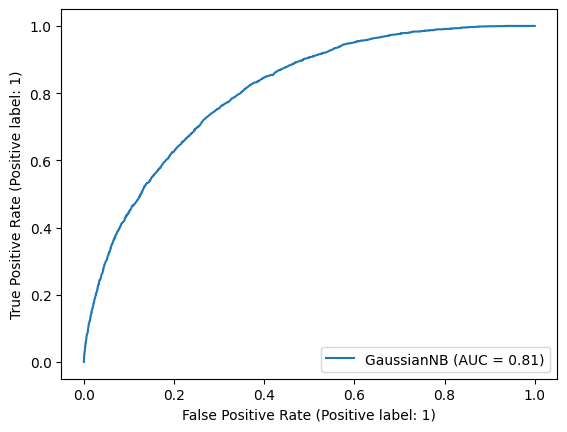

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(LR, x_test, y_test)
RocCurveDisplay.from_estimator(SVM, x_test, y_test)
RocCurveDisplay.from_estimator(DT, x_test, y_test)
RocCurveDisplay.from_estimator(KNN, x_test, y_test)
RocCurveDisplay.from_estimator(NB, x_test, y_test)

plt.show()